# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis_Linux/Tennis.x86")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])
print('The state for the second agent looks like:', states[1])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]
The state for the second agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.4669857  -1.5
  0.          0.         -6.83172083  6.          0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [ ]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F

def hidden_init(layer):
    fan_in = layer.weight.data.size()[0]
    lim = 1. / np.sqrt(fan_in)
    return (-lim, lim)

class Actor(nn.Module):
    """Actor (Policy) Model."""

    def __init__(self, state_size, action_size, seed, fc1_units=256, fc2_units=128):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
            fc1_units (int): Number of nodes in first hidden layer
            fc2_units (int): Number of nodes in second hidden layer
        """
        super(Actor, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fc1 = nn.Linear(state_size, fc1_units)
        self.batch_norm = nn.BatchNorm1d(fc1_units)
        self.fc2 = nn.Linear(fc1_units, fc2_units)
        self.fc3 = nn.Linear(fc2_units, action_size)
        self.reset_parameters()

    def reset_parameters(self):
        self.fc1.weight.data.uniform_(*hidden_init(self.fc1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        self.fc3.weight.data.uniform_(-3e-3, 3e-3)

    def forward(self, state):
        """Build an actor (policy) network that maps states -> actions."""
        x = F.relu(self.batch_norm(self.fc1(state)))
        x = F.relu(self.fc2(x))
        return F.tanh(self.fc3(x))


class Critic(nn.Module):
    """Critic (Value) Model."""

    def __init__(self, state_size, action_size, seed, fcs1_units=256, fc2_units=128):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
            fcs1_units (int): Number of nodes in the first hidden layer
            fc2_units (int): Number of nodes in the second hidden layer
        """
        super(Critic, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fcs1 = nn.Linear(state_size, fcs1_units)
        self.batch_norm = nn.BatchNorm1d(fcs1_units)
        self.fc2 = nn.Linear(fcs1_units+action_size, fc2_units)
        self.fc3 = nn.Linear(fc2_units, 1)
        self.reset_parameters()

    def reset_parameters(self):
        self.fcs1.weight.data.uniform_(*hidden_init(self.fcs1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        self.fc3.weight.data.uniform_(-3e-3, 3e-3)

    def forward(self, state, action):
        """Build a critic (value) network that maps (state, action) pairs -> Q-values."""
        xs = F.relu(self.batch_norm(self.fcs1(state)))
        x = torch.cat((xs, action), dim=1)
        x = F.relu(self.fc2(x))
        return self.fc3(x)


In [6]:
import random
import copy
from collections import namedtuple, deque

import torch.optim as optim

BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 256        # minibatch size
EPSILON = 1.0           # noise factor
EPSILON_DECAY = 0.9999      # factor for noise decay
GAMMA = 0.99            # discount factor
TAU = 1e-3                 # for soft update of target parameters
LR_ACTOR = 1e-4         # learning rate of the actor 
LR_CRITIC = 3e-4        # learning rate of the critic
WEIGHT_DECAY = 0        # L2 weight decay
UPDATE_EVERY = 2       # how often to update the network (in timesteps)
UPDATE_PER_TIMESTEP=5  # how often to update the network per timestep
NOISE_DECAY = 0.99
BEGIN_TRAINING_AT = 30
NOISE_START = 1.0
NOISE_END = 0.1

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class Agent():
    """Interacts with and learns from the environment."""
    
    def __init__(self, state_size, action_size, random_seed):
        """Initialize an Agent object.
        
        Params
        ======
            state_size (int): dimension of each state
            action_size (int): dimension of each action
            random_seed (int): random seed
        """
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(random_seed)

        # Actor Network (w/ Target Network)
        self.actor_local = Actor(state_size, action_size, random_seed).to(device)
        self.actor_target = Actor(state_size, action_size, random_seed).to(device)
        self.actor_optimizer = optim.Adam(self.actor_local.parameters(), lr=LR_ACTOR)

        # Critic Network (w/ Target Network)
        self.critic_local = Critic(num_agents*state_size, num_agents*action_size, random_seed).to(device)
        self.critic_target = Critic(num_agents*state_size, num_agents*action_size, random_seed).to(device)
        self.critic_optimizer = optim.Adam(self.critic_local.parameters(), lr=LR_CRITIC, weight_decay=WEIGHT_DECAY)

        self.full_state_size = num_agents*state_size
        self.full_action_size = num_agents*action_size
        
        # Noise process
        #self.noise = OUNoise(action_size, random_seed)
        self.noise = RandomNoise(self.action_size,
                                 NOISE_START, NOISE_END, NOISE_DECAY,
                                 BEGIN_TRAINING_AT, random_seed)

        self.epsilon = EPSILON
        self.t_step = 0

    
    def step(self, state, action, reward, next_state, done):
        """Save experience in replay memory, and use random sample from buffer to learn."""
        # Save experience / reward 
        self.memory.add(state, action, reward, next_state, done)

        # Learn every UPDATE_EVERY time steps.
        self.t_step = (self.t_step + 1) % UPDATE_EVERY
        if self.t_step == 0:
            for _ in range(UPDATE_PER_TIMESTEP):
                # Learn, if enough samples are available in memory
                if len(self.memory) > BATCH_SIZE:
                    experiences = self.memory.sample()
                    self.learn(experiences, GAMMA)

    def act(self, states, i_episode=0, add_noise=True, eps=0.):
        """Returns actions for given state as per current policy."""
        states = torch.from_numpy(states).float().to(device)
        self.actor_local.eval()
        with torch.no_grad():
            actions = self.actor_local(states).cpu().data.numpy()
        self.actor_local.train()
        if add_noise:
            #actions += self.noise.sample() * self.epsilon
            #actions += self.noise.sample() * eps
            self.noise.sample(i_episode)
        return np.clip(actions, -1, 1)


    def reset(self):
        self.noise.reset()

    def learn(self, experiences, agent_index, gamma, actions_pred):
        """Update policy and value parameters using given batch of experience tuples.
        Q_targets = r + γ * critic_target(next_state, actor_target(next_state))
        where:
            actor_target(state) -> action
            critic_target(state, action) -> Q-value

        Params
        ======
            experiences (Tuple[torch.Tensor]): tuple of (s, a, r, s', done) tuples
            agent_index (int): agent index
            gamma (float): discount factor
            actions_pred (torch.Tensor): predicted actions
        """
        states, actions, rewards, next_states, dones = experiences


        # ---------------------------- update critic ---------------------------- #
        # Get predicted next-state actions and Q values from target models
        actions_next = self.actor_target(next_states)
        Q_targets_next = self.critic_target(next_states.view(-1,self.full_state_size), actions_next.view(-1,self.full_action_size))
        # Compute Q targets for current states (y_i)
        Q_targets = rewards[:,agent_index].view(-1,1) + (gamma * Q_targets_next * (1 - dones[:,agent_index].view(-1,1)))
        # Compute critic loss
        Q_expected = self.critic_local(states.view(-1,self.full_state_size), actions.view(-1,self.full_action_size))
        critic_loss = F.mse_loss(Q_expected, Q_targets)
        # Minimize the loss
        self.critic_optimizer.zero_grad()
        critic_loss.backward()
        torch.nn.utils.clip_grad_norm_(self.critic_local.parameters(), 1)
        self.critic_optimizer.step()
        #print("CriticLoss",critic_loss.item())

        # ---------------------------- update actor ---------------------------- #       
        # Compute actor loss
        actor_loss = -self.critic_local(states.view(-1,self.full_state_size), actions_pred).mean()
        # Minimize the loss
        self.actor_optimizer.zero_grad()
        actor_loss.backward()
        self.actor_optimizer.step()
        #print("ActorLoss",actor_loss.item())

        # ----------------------- update target networks ----------------------- #
        #self.soft_update(self.critic_local, self.critic_target, TAU)
        #self.soft_update(self.actor_local, self.actor_target, TAU)
        
        # ----------------------- update epsilon and noise ----------------------- #
        #self.epsilon *= EPSILON_DECAY
        self.noise.reset()

    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target

        Params
        ======
            local_model: PyTorch model (weights will be copied from)
            target_model: PyTorch model (weights will be copied to)
            tau (float): interpolation parameter 
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)

class OUNoise:
    """Ornstein-Uhlenbeck process."""

    def __init__(self, size, seed, mu=0., theta=0.15, sigma=0.2):
        """Initialize parameters and noise process."""
        self.mu = mu * np.ones(size)
        self.theta = theta
        self.sigma = sigma
        self.seed = random.seed(seed)
        self.reset()

    def reset(self):
        """Reset the internal state (= noise) to mean (mu)."""
        self.state = copy.copy(self.mu)

    def sample(self):
        """Update internal state and return it as a noise sample."""
        x = self.state
        dx = self.theta * (self.mu - x) + self.sigma * np.array([random.random() for i in range(len(x))])
        self.state = x + dx
        return self.state

    
class RandomNoise:
    """Random noise process."""
    def __init__(self, size, weight, min_weight, noise_decay,
                 begin_noise_at, seed):
        self.size = size
        self.weight_start = weight
        self.weight = weight
        self.min_weight = min_weight
        self.noise_decay = noise_decay
        self.begin_noise_at = begin_noise_at
        self.seed = random.seed(seed)

    def reset(self):
        self.weight = self.weight_start

    def sample(self, i_episode):
        pwr = max(0, i_episode - self.begin_noise_at)
        if pwr > 0:
            self.weight = max(self.min_weight, self.noise_decay**pwr)
        return self.weight * 0.5 * np.random.standard_normal(self.size)    
    

class ReplayBuffer:
    """Fixed-size buffer to store experience tuples."""

    def __init__(self, action_size, buffer_size, batch_size, seed):
        """Initialize a ReplayBuffer object.
        Params
        ======
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
        """
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)  # internal memory (deque)
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)
    
    def add(self, state, action, reward, next_state, done):
        """Add a new experience to memory."""
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)
    
    def sample(self):
        """Randomly sample a batch of experiences from memory."""
        experiences = random.sample(self.memory, k=self.batch_size)

        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).float().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)

        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)

In [7]:
class MultiAgent:
    def __init__(self, state_size, action_size, random_seed, discount_factor=0.95, tau=0.02):
        super(MultiAgent, self).__init__()

        # critic input = obs_full + actions = 14+2+2+2=20
        self.multi_agent = [Agent(state_size,action_size,random_seed), 
                            Agent(state_size,action_size,random_seed)]
        
        self.discount_factor = GAMMA
        self.tau = TAU
        # Replay memory
        self.memory = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, random_seed)
        self.t_step = 0

    def get_actors(self):
        """get actors of all the agents in the Multi Agent object"""
        actors = [agent.actor for agent in self.multi_agent]
        return actors

    def get_target_actors(self):
        """get target_actors of all the agents in the Multi Agent object"""
        target_actors = [agent.target_actor for agent in self.multi_agent]
        return target_actors

    def act(self, obs_all_agents, i_episode=0, add_noise=True, eps=0.):
        """get actions from all agents in the Multi Agent object"""
        actions = [np.squeeze(agent.act(np.expand_dims(obs,axis=0), add_noise, eps),axis=0) for agent, obs in zip(self.multi_agent, obs_all_agents)]
        return np.array(actions)

    def target_act(self, obs_all_agents, add_noise=True):
        """get target network actions from all the agents in the Multi Agent object """
        target_actions = [agent.target_act(obs, add_noise) for agent, obs in zip(self.multi_agent, obs_all_agents)]
        return target_actions

    def reset(self):
        for agent in self.multi_agent:
            agent.reset()
    
    def step(self, states, actions, rewards, next_states, dones):
        """update the critics and actors of all the agents """

        """Save experience in replay memory, and use random sample from buffer to learn."""
        # Save experience / reward 
        self.memory.add(states, actions, rewards, next_states, dones)

        # Learn every UPDATE_EVERY time steps.
        self.t_step = (self.t_step + 1) % UPDATE_EVERY
        if self.t_step == 0:
            for _ in range(UPDATE_PER_TIMESTEP):
                # Learn, if enough samples are available in memory
                if len(self.memory) > BATCH_SIZE:
                    for i,ag in enumerate(self.multi_agent):
                        experiences = self.memory.sample()
                        #ag.learn(experiences, i, GAMMA)
                        self.learn(experiences, ag, i, GAMMA)
        
                    self.update_targets()
        
       

    def learn(self, experiences, agent, agent_index, gamma):
        states, actions, rewards, next_states, dones = experiences
        actions_pred = agent.actor_local(states.index_select(0, torch.tensor(range(agent_index,states.shape[0],num_agents)).to(device)))
        actions_pred = torch.cat([actions_pred if j==agent_index else actions.index_select(0, torch.tensor(range(j,states.shape[0],num_agents)).to(device)) for j, agent in enumerate(self.multi_agent)],dim=1)
        agent.learn(experiences, agent_index, gamma, actions_pred)
        
        
    def update_targets(self):
        """soft update targets"""
        for agent in self.multi_agent:
            agent.soft_update(agent.actor_local, agent.actor_target, self.tau)
            agent.soft_update(agent.critic_local, agent.critic_target, self.tau)

Episode [10/10000]	Average Score: $0.0000
Episode [20/10000]	Average Score: $0.0000
Episode [30/10000]	Average Score: $0.0000
Episode [40/10000]	Average Score: $0.0000
Episode [50/10000]	Average Score: $0.0000
Episode [60/10000]	Average Score: $0.0000
Episode [70/10000]	Average Score: $0.0000
Episode [80/10000]	Average Score: $0.0000
Episode [90/10000]	Average Score: $0.0000
Episode [100/10000]	Average Score: $0.0000
Episode [110/10000]	Average Score: $0.0000
Episode [120/10000]	Average Score: $0.0000
Episode [130/10000]	Average Score: $0.0000
Episode [140/10000]	Average Score: $0.0000
Episode [150/10000]	Average Score: $0.0010
Episode [160/10000]	Average Score: $0.0010
Episode [170/10000]	Average Score: $0.0050
Episode [180/10000]	Average Score: $0.0060
Episode [190/10000]	Average Score: $0.0070
Episode [200/10000]	Average Score: $0.0070
Episode [210/10000]	Average Score: $0.0070
Episode [220/10000]	Average Score: $0.0070
Episode [230/10000]	Average Score: $0.0070
Episode [240/10000]	

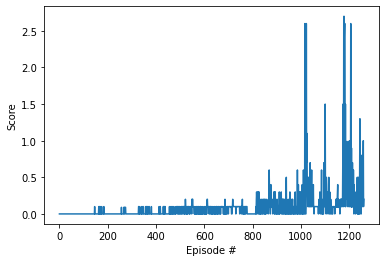

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
from collections import deque

# Initialize Feed-forward DNNs for Actor and Critic models for multi agent. 
agent = MultiAgent(state_size=state_size, action_size=action_size, random_seed=0)


def maddpg(n_episodes=10000):
    """Multi Agent Deep Deterministic Policy Gradient.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
    """

    scores = []                      # list containing max scores over both agents from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    epsilon = EPSILON
    
    for episode in range(n_episodes): 
        # Reset the enviroment
        env_info = env.reset(train_mode=True)[brain_name]

        # all observations
        states = env_info.vector_observations

        agent.reset()
        
        score = np.zeros(num_agents)
        t = 0
        while True:

            # Predict the actions for the current states of both agents. 
            actions = agent.act(states, i_episode = t, add_noise = True, eps=epsilon)

            # Send actions to the environment
            env_info = env.step(actions)[brain_name]

            next_states = env_info.vector_observations   # get the next states
            rewards = env_info.rewards                   # get the rewards
            dones = env_info.local_done

            # states, actions, rewards, next states are stored in the experience replay
            agent.step(states, actions, rewards, next_states, dones)

            # roll over new state
            states = next_states

            # sum up rewards
            score += rewards

            if np.any(dones):
                break
        t += 1        
        epsilon *= EPSILON_DECAY

        max_score = np.max(score)            # max score over both agents for a single episode
        scores_window.append(max_score)       # save most recent score
        scores.append(max_score)              # save most recent score
        print('\rEpisode {}\tAverage Score: {:.4f}'.format(episode + 1, np.mean(scores_window)), end="")
        if (episode + 1) % 10 == 0: # print average score over last 10 episodes
            print('\rEpisode [{}/{}]\tAverage Score: ${:.4f}'.format(episode + 1, n_episodes, np.mean(scores_window)))
        if np.mean(scores_window)>=0.5:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.4f}'.format(episode + 1, np.mean(scores_window)))
            for i, ag in enumerate(agent.multi_agent):
                torch.save(ag.actor_local.state_dict(), 'checkpoint_actor_local_{:d}.pth'.format(i))
                torch.save(ag.critic_local.state_dict(), 'checkpoint_critic_local_{:d}.pth'.format(i))
            break
            
    return scores

scores = maddpg()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 5. Watch a Smart Agent!

In the next code cell, you will load the trained weights from file to watch a smart agent!

In [8]:
agent = MultiAgent(state_size=state_size, action_size=action_size, random_seed=0)
# load the weights from file for actor_local of both agents
agent.multi_agent[0].actor_local.load_state_dict(torch.load('checkpoint_actor_local_0.pth'))
agent.multi_agent[1].actor_local.load_state_dict(torch.load('checkpoint_actor_local_1.pth'))

for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    actions = np.zeros((num_agents,action_size))
    while True:
        for j, ag in enumerate(agent.multi_agent):
            actions[j] = ag.act(np.expand_dims(states[j],axis=0),add_noise=False) # select an action based on the smart agents
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.30000000447034836
Score (max over agents) from episode 2: 0.800000011920929
Score (max over agents) from episode 3: 0.20000000298023224
Score (max over agents) from episode 4: 0.4000000059604645
Score (max over agents) from episode 5: 0.800000011920929


When finished, you can close the environment.

In [9]:
env.close()